In [4]:
# librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd
 #as gdp
#from mpl_toolkits.basemap import basemap # library to plot maps

In [5]:
import geoplot

In [6]:
# open the file
df = pd.read_csv('meteorite-landings.csv')
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [39]:
df.shape
#(45716, 10) 
#(45424, 10) drop rows if NaN in year and select only year>=860 & year<=2016 (kaggle)
#(45309, 10) drop rows if Nan in mass
#(31705, 10) clean longitude & latitude columns (kaggle)

(31705, 10)

In [8]:
df.dtypes

name            object
id               int64
nametype        object
recclass        object
mass           float64
fall            object
year           float64
reclat         float64
reclong        float64
GeoLocation     object
dtype: object

# clean the data

In [38]:
df.isna().sum()

name           0
id             0
nametype       0
recclass       0
mass           0
fall           0
year           0
reclat         0
reclong        0
GeoLocation    0
dtype: int64

In [10]:
# clean year's column
df = df[np.isfinite(df['year'])]
df = df[(df.year >=860) & (df.year <=2016)]
pd.to_numeric(df.year,downcast='integer')

0        1880
1        1951
2        1952
3        1976
4        1902
5        1919
6        1949
7        1814
8        1930
9        1920
10       1974
11       1925
12       1769
13       1949
14       1838
15       1959
16       1981
17       1957
18       2001
19       1806
20       1766
21       1949
22       2002
23       1835
24       1873
25       1860
26       1900
27       1883
28       1899
29       1969
         ... 
45685    2006
45686    1914
45687    2011
45688    2011
45689    2011
45690    1946
45691    1792
45692    1969
45693    1919
45694    1999
45695    1987
45696    1998
45697    1998
45698    1930
45699    1984
45701    1998
45702    2002
45703    1955
45704    1973
45705    1967
45706    1956
45707    1983
45708    1966
45709    1981
45710    1990
45711    1990
45712    1999
45713    1939
45714    2003
45715    1976
Name: year, Length: 45424, dtype: int16

In [11]:
# columns with 2 values :
df.fall.value_counts(normalize=True)

Found    0.97563
Fell     0.02437
Name: fall, dtype: float64

In [12]:
df.nametype.value_counts(normalize=True)

Valid     0.998371
Relict    0.001629
Name: nametype, dtype: float64

In [13]:
# clean mass's column
df = df[np.isfinite(df['mass'])]

In [14]:
# clean reclat's & reclong's columns 
df = df[(df.reclat != 0.0) & (df.reclong != 0.0)]
df = df[(df.reclong <=180) & (df.reclong >=-180)]

In [37]:
df = df[np.isfinite(df['reclat'])]

# Descriptive stats and visualisation

In [15]:
df.describe()

,id,mass,year,reclat,reclong
count,31705.000000,3.170500e+04,31705.000000,31705.000000,31705.000000
mean,20751.653272,1.867359e+04,1987.087084,-47.602009,73.452607
std,14974.205352,6.892699e+05,26.791228,46.714171,83.419083
min,1.000000,0.000000e+00,860.000000,-87.366670,-165.433330
25%,9190.000000,6.530000e+00,1983.000000,-79.683330,26.000000
50%,18511.000000,3.007000e+01,1991.000000,-72.000000,57.147030
75%,27300.000000,2.050000e+02,2000.000000,18.393170,159.414820
max,57455.000000,6.000000e+07,2013.000000,81.166670,178.200000


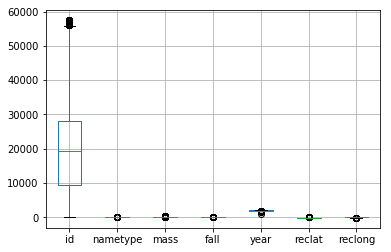

In [154]:
df2.boxplot()

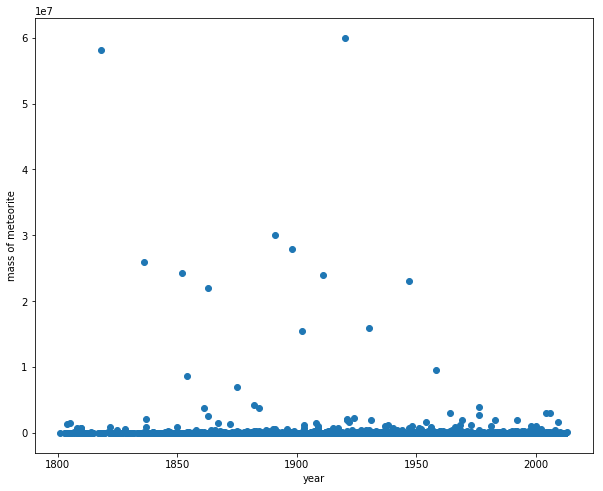

In [166]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(df3['year'], df3['mass'])
ax.set_ylabel('mass of meteorite')
ax.set_xlabel('year')
plt.show()

In [140]:
stats = df.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
id,31705.0,20751.653272,14974.205352,1.00000,9190.00000,18511.00000,27300.00000,5.745500e+04,18110.00000
nametype,31705.0,0.999338,0.025728,0.00000,1.00000,1.00000,1.00000,1.000000e+00,0.00000
mass,31705.0,18673.585234,689269.886629,0.00000,6.53000,30.07000,205.00000,6.000000e+07,198.47000
fall,31705.0,0.966472,0.180013,0.00000,1.00000,1.00000,1.00000,1.000000e+00,0.00000
year,31705.0,1987.087084,26.791228,860.00000,1983.00000,1991.00000,2000.00000,2.013000e+03,17.00000
reclat,31705.0,-47.602009,46.714171,-87.36667,-79.68333,-72.00000,18.39317,8.116667e+01,98.07650
reclong,31705.0,73.452607,83.419083,-165.43333,26.00000,57.14703,159.41482,1.782000e+02,133.41482


In [144]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [150]:
df2 = remove_outlier(df,'mass')

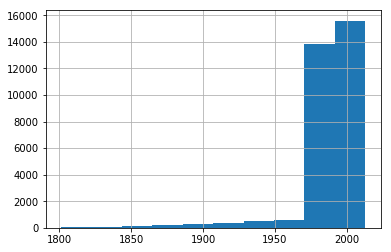

In [164]:
df3['year'].hist()

In [171]:
df3 = df[(df.year >=1800) & (df.year <=2016)]

(1900, 2014)

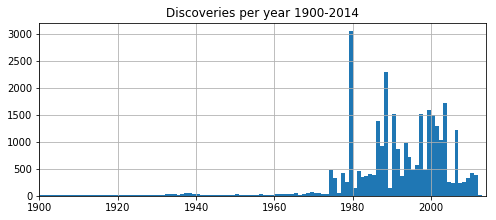

In [173]:
plt.subplot(211)
df.year.hist(bins=np.arange(1900,2014,1),figsize=(8,7))
plt.title('Discoveries per year 1900-2014')
plt.xlim(1900,2014)

In [201]:
fall_mean = dum[["found", "fell"]].groupby(["year"]).agg("mean")
fall_mean.plot.bar()

KeyError: 'year'

In [134]:
df.corr()

,id,nametype,mass,fall,year,reclat,reclong
id,1.000000,-0.052221,-0.014712,0.053076,0.238671,0.056363,-0.183254
nametype,-0.052221,1.000000,0.000697,-0.004795,-0.016436,-0.045768,0.010203
mass,-0.014712,0.000697,1.000000,-0.007814,-0.124215,0.036230,-0.027062
fall,0.053076,-0.004795,-0.007814,1.000000,0.508986,-0.310099,0.118656
year,0.238671,-0.016436,-0.124215,0.508986,1.000000,-0.229160,0.197239
reclat,0.056363,-0.045768,0.036230,-0.310099,-0.229160,1.000000,-0.534294
reclong,-0.183254,0.010203,-0.027062,0.118656,0.197239,-0.534294,1.000000


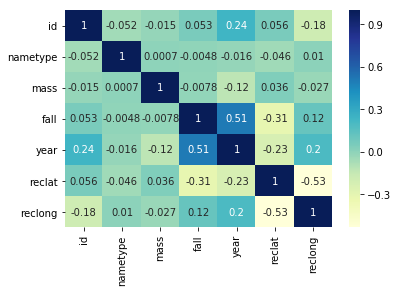

In [135]:
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)
#seems a correlation between fall & year

In [19]:
# fall : dummies 

In [20]:
def dummies(val):
    if val == 'Fell':
        val = 0
    elif val == 'Found':
        val = 1
    return val
df['fall'] = df['fall'].apply(lambda val : dummies(val) if pd.isnull(val) == False else np.nan)           

In [21]:
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,0,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,0,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,0,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,0,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,0,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [22]:
# not relevant
def dummies2(val):
    if val == 'Relict':
        val = 0
    elif val == 'Valid':
        val = 1
    return val
df['nametype'] = df['nametype'].apply(lambda val : dummies2(val) if pd.isnull(val) == False else np.nan)           

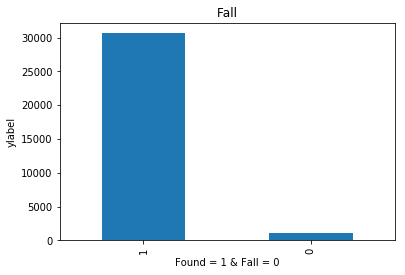

In [127]:
df.fall.value_counts().plot.bar()
plt.title('Fall')
plt.xlabel('Found = 1 & Fall = 0')
#plt.ylabel('ylabel')
#plt.legend(['Meteorites Found','Meteorites Seen Falling']) ?
plt.show()
## pas assez de données 

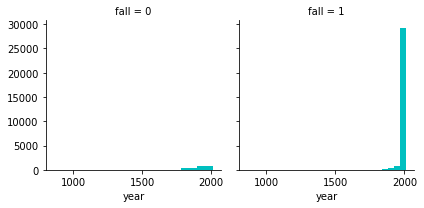

In [92]:
g = sns.FacetGrid(df, col="fall")
g = g.map(plt.hist, "year", color="c")

In [ ]:
'''
geometry = [Point(float(x), float(y)) for x, y in zip(df.reclong, df.reclat)]
'''

In [35]:
from mpl_toolkits.basemap import Basemap

Text(0.5, 1.0, 'Map of all impacts')

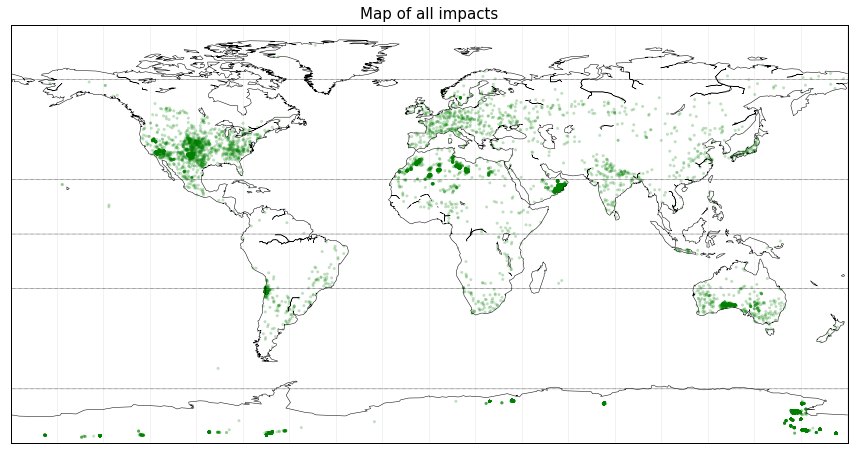

In [60]:
# MAP OF ALL IMPACTS
fig, ax = plt.subplots(figsize = (15, 10))
map = Basemap(projection='cyl')
map.drawmapboundary(fill_color='w')
map.drawcoastlines(linewidth=0.5)
map.drawmeridians(range(0, 360, 20),linewidth=0.1)
map.drawparallels([-66.56083,-23.5,0.0,23.5,66.56083], linewidth=0.6) 
#plotting equator and tropics and polar circles

x, y = map(df.reclong,df.reclat)

map.scatter(x, y, marker='.',alpha=0.25,c='green',edgecolor='None')
plt.title('Map of all impacts', fontsize=15)

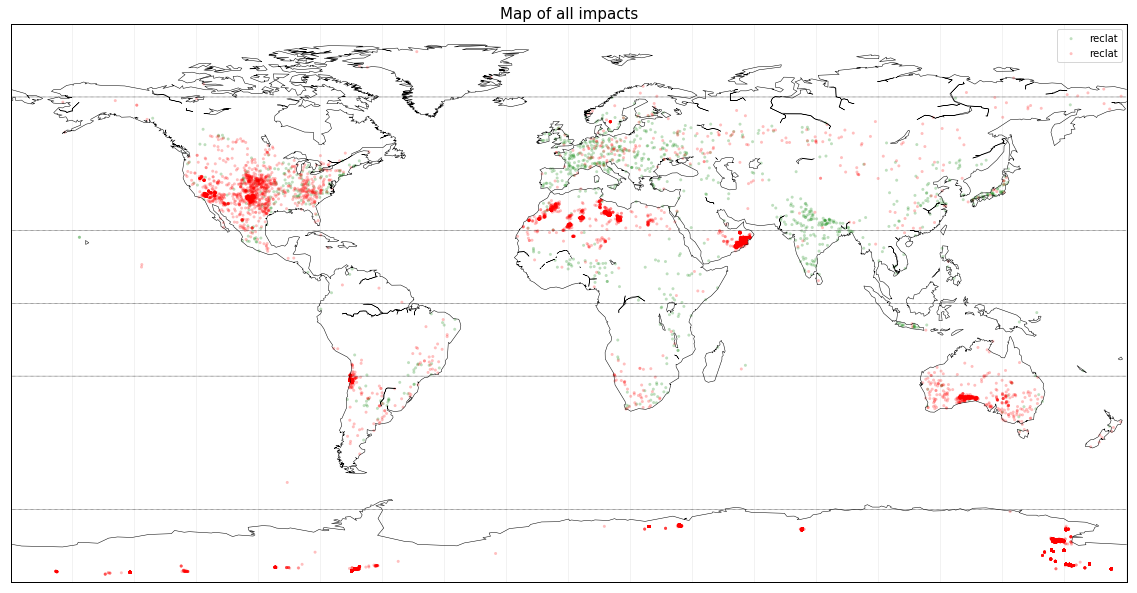

In [72]:
# MAP OF FOUND OR FELL METEORITES
fig, ax = plt.subplots(figsize = (20, 15))
map = Basemap(projection='cyl')
map.drawmapboundary(fill_color='w')
map.drawcoastlines(linewidth=0.5)
map.drawmeridians(range(0, 360, 20),linewidth=0.1)
map.drawparallels([-66.56083,-23.5,0.0,23.5,66.56083], linewidth=0.6) 
#plotting equator and tropics and polar circles

x1, y1 = map(df[df.fall == 0].reclong,df[df.fall == 0].reclat)
map.scatter(x1, y1, marker='.',alpha=0.25,c='green',edgecolor='None')

x1, y1 = map(df[df.fall == 1].reclong,df[df.fall == 1].reclat)
map.scatter(x1, y1, marker='.',alpha=0.25,c='red',edgecolor='None')
#plt.legend()
plt.title('Map of all impacts', fontsize=15)
plt.show()

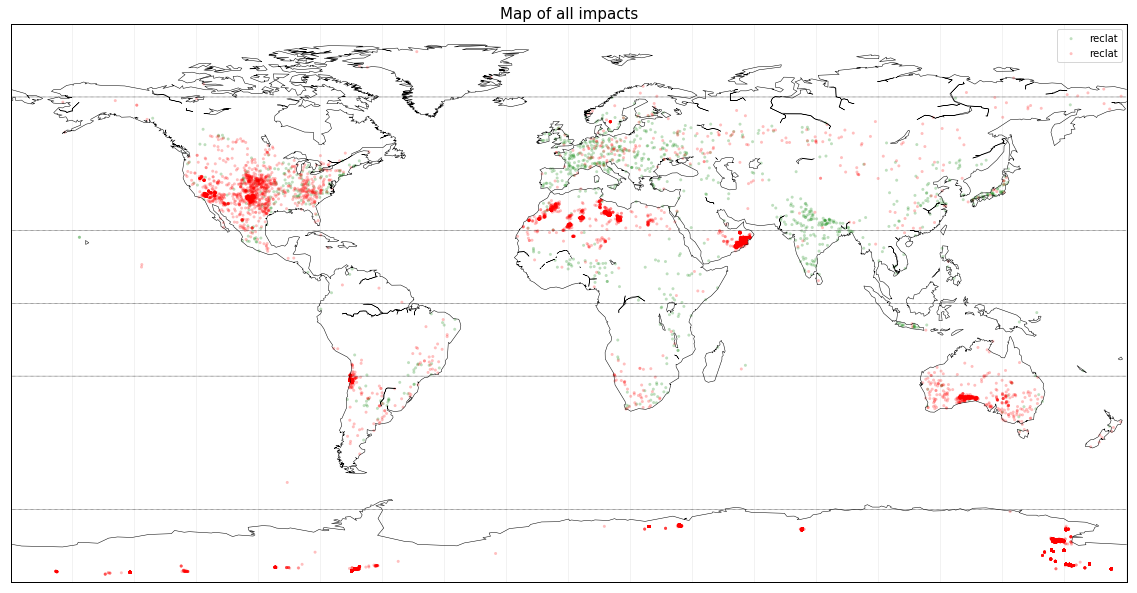

In [72]:
# MAP OF FOUND OR FELL METEORITES
fig, ax = plt.subplots(figsize = (20, 15))
map = Basemap(projection='cyl')
map.drawmapboundary(fill_color='w')
map.drawcoastlines(linewidth=0.5)
map.drawmeridians(range(0, 360, 20),linewidth=0.1)
map.drawparallels([-66.56083,-23.5,0.0,23.5,66.56083], linewidth=0.6) 
#plotting equator and tropics and polar circles

x1, y1 = map(df[df.fall == 0].reclong,df[df.fall == 0].reclat)
map.scatter(x1, y1, marker='.',alpha=0.25,c='green',edgecolor='None')

x1, y1 = map(df[df.fall == 1].reclong,df[df.fall == 1].reclat)
map.scatter(x1, y1, marker='.',alpha=0.25,c='red',edgecolor='None')
#plt.legend()
plt.title('Map of all impacts', fontsize=15)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


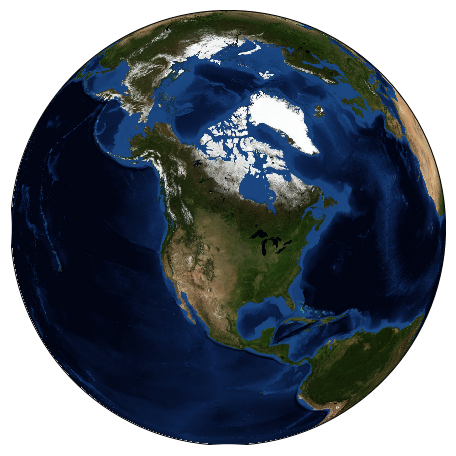

In [99]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


TypeError: input must be an array, list, tuple or scalar

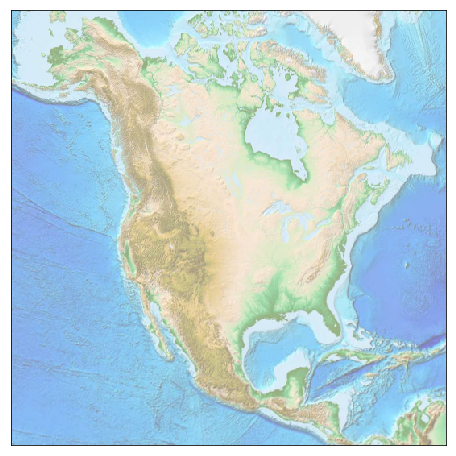

In [123]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(df.reclong,df.reclat)
plt.scatter(x, y)

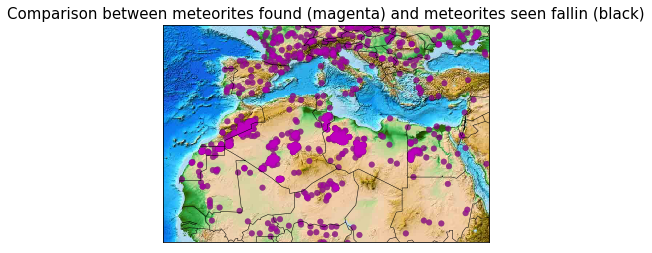

In [113]:
map = Basemap(projection='cyl',llcrnrlat=10,llcrnrlon=-20,urcrnrlat=50,urcrnrlon=40,resolution='c')
map.etopo()
map.drawcountries()

map.scatter(df.reclong,df.reclat,edgecolor='none',color='k',alpha=0.5)
map.scatter(df.reclong,df.reclat,edgecolor='none',color='m',alpha=0.5)

plt.title('Comparison between meteorites found (magenta) and meteorites seen fallin (black)', fontsize=15)
plt.show()

In [199]:
#dum = pd.get_dummies(df3, columns=['fall'])
dum

,name,id,nametype,recclass,mass,year,reclat,reclong,GeoLocation,found,fell
0,Aachen,1,1,L5,21.0,1880.0,50.77500,6.08333,"(50.775000, 6.083330)",1,0
1,Aarhus,2,1,H6,720.0,1951.0,56.18333,10.23333,"(56.183330, 10.233330)",1,0
2,Abee,6,1,EH4,107000.0,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)",1,0
3,Acapulco,10,1,Acapulcoite,1914.0,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)",1,0
4,Achiras,370,1,L6,780.0,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)",1,0
5,Adhi Kot,379,1,EH4,4239.0,1919.0,32.10000,71.80000,"(32.100000, 71.800000)",1,0
6,Adzhi-Bogdo (stone),390,1,LL3-6,910.0,1949.0,44.83333,95.16667,"(44.833330, 95.166670)",1,0
7,Agen,392,1,H5,30000.0,1814.0,44.21667,0.61667,"(44.216670, 0.616670)",1,0
8,Aguada,398,1,L6,1620.0,1930.0,-31.60000,-65.23333,"(-31.600000, -65.233330)",1,0
9,Aguila Blanca,417,1,L,1440.0,1920.0,-30.86667,-64.55000,"(-30.866670, -64.550000)",1,0


In [197]:
dum.columns = dum.columns.str.replace('fall_0','found').str.replace('fall_1','fell')

In [198]:
dum.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass', 'year', 'reclat',
       'reclong', 'GeoLocation', 'found', 'fell'],
      dtype='object')